## **MIN - MAX Scaling**

In [107]:
import seaborn as sns

df = sns.load_dataset('diamonds')
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [108]:
# Getting numerical columns

numerical_columns = df.select_dtypes(include = 'number').columns
categorical_columns = df.select_dtypes(exclude = 'number').columns
categorical_columns, numerical_columns

(Index(['cut', 'color', 'clarity'], dtype='object'),
 Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object'))

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [110]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

min_max_scaler = MinMaxScaler()

scaled_df = pd.DataFrame(min_max_scaler.fit_transform(df[numerical_columns]), columns=numerical_columns)

df.drop(numerical_columns, axis=1, inplace=True)

df = pd.concat([df, scaled_df], axis=1)


In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.124312,0.098547,0.0,0.041580,0.103950,0.174636,1.0
depth,53940.0,0.520817,0.039795,0.0,0.500000,0.522222,0.541667,1.0
table,53940.0,0.278023,0.042971,0.0,0.250000,0.269231,0.307692,1.0
price,53940.0,0.194994,0.215680,0.0,0.033735,0.112180,0.270219,1.0
x,53940.0,0.533627,0.104447,0.0,0.438547,0.530726,0.608939,1.0
y,53940.0,0.097360,0.019391,0.0,0.080136,0.096944,0.111036,1.0
z,53940.0,0.111281,0.022192,0.0,0.091509,0.111006,0.127044,1.0


<br>

# **Unit Vector Scaling**

In [112]:
import seaborn as sns

df = sns.load_dataset('iris')
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [114]:
n_col = df.select_dtypes(include = 'number').columns
c_col = df.select_dtypes(exclude = 'number').columns

n_col, c_col

(Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object'),
 Index(['species'], dtype='object'))

In [115]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

scaled_data =  pd.DataFrame(normalizer.fit_transform(df[n_col]), columns = n_col)
scaled_data

,sepal_length,sepal_width,petal_length,petal_width
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


In [116]:
df.drop(n_col, axis=1, inplace=True)
df = pd.concat([df, scaled_data], axis = 1)

In [117]:
df

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,0.803773,0.551609,0.220644,0.031521
1,setosa,0.828133,0.507020,0.236609,0.033801
2,setosa,0.805333,0.548312,0.222752,0.034269
3,setosa,0.800030,0.539151,0.260879,0.034784
4,setosa,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...,...
145,virginica,0.721557,0.323085,0.560015,0.247699
146,virginica,0.729654,0.289545,0.579090,0.220054
147,virginica,0.716539,0.330710,0.573231,0.220474
148,virginica,0.674671,0.369981,0.587616,0.250281


<br>

## **Z_SCORE SCALER**

In [119]:
import seaborn as sns

df =  sns.load_dataset('iris')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [121]:
numerical_columns =  df.select_dtypes(include = 'number').columns


In [122]:
df[numerical_columns] = (df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std()


,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.897674,1.015602,-1.335752,-1.311052,setosa
1,-1.139200,-0.131539,-1.335752,-1.311052,setosa
2,-1.380727,0.327318,-1.392399,-1.311052,setosa
3,-1.501490,0.097889,-1.279104,-1.311052,setosa
4,-1.018437,1.245030,-1.335752,-1.311052,setosa
...,...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994,virginica
146,0.551486,-1.278680,0.703564,0.919223,virginica
147,0.793012,-0.131539,0.816859,1.050416,virginica
148,0.430722,0.786174,0.930154,1.443994,virginica


<br>

## **Standard Scaler**

In [127]:
import seaborn as sns

df = sns.load_dataset('iris')
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [130]:
n_col = df.select_dtypes(include = 'number').columns
c_col = df.select_dtypes(exclude = 'number').columns

n_col, c_col

(Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object'),
 Index(['species'], dtype='object'))

In [133]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

scaled_df = pd.DataFrame(std_scaler.fit_transform(df[n_col]), columns = n_col)

In [137]:
df.drop(n_col, axis = 1, inplace = True)
df = pd.concat([df, scaled_df], axis=1)

In [138]:
df

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,-0.900681,1.019004,-1.340227,-1.315444
1,setosa,-1.143017,-0.131979,-1.340227,-1.315444
2,setosa,-1.385353,0.328414,-1.397064,-1.315444
3,setosa,-1.506521,0.098217,-1.283389,-1.315444
4,setosa,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...,...
145,virginica,1.038005,-0.131979,0.819596,1.448832
146,virginica,0.553333,-1.282963,0.705921,0.922303
147,virginica,0.795669,-0.131979,0.819596,1.053935
148,virginica,0.432165,0.788808,0.933271,1.448832


<br>

## **PCA**

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = sns.load_dataset('iris')

X = iris.select_dtypes(include = 'number').columns
y = iris['species']

In [161]:
std_scaler =  StandardScaler()

iris_scaled = pd.DataFrame(std_scaler.fit_transform(df[X]), columns = X)

pca = PCA(n_components=0.95)

X_pca = pd.DataFrame(pca.fit_transform(iris_scaled), columns = ['PC1', 'PC2'])

X_pca

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [153]:
iris_pca = pd.concat([X_pca, y], axis =1)

In [154]:
iris_pca

,PC1,PC2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


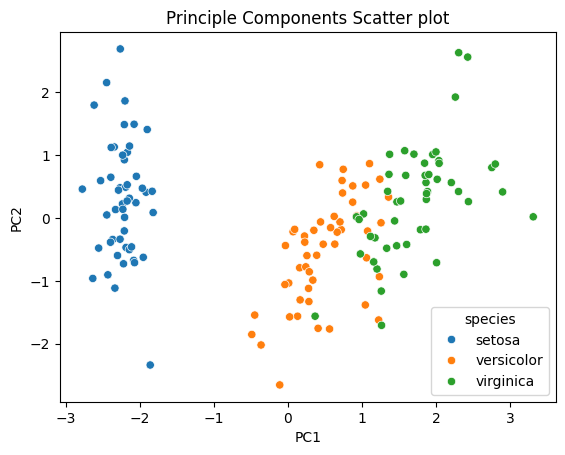

In [155]:
sns.scatterplot(data = iris_pca, x = 'PC1', y = 'PC2', hue = 'species')
plt.title('Principle Components Scatter plot')
plt.show()

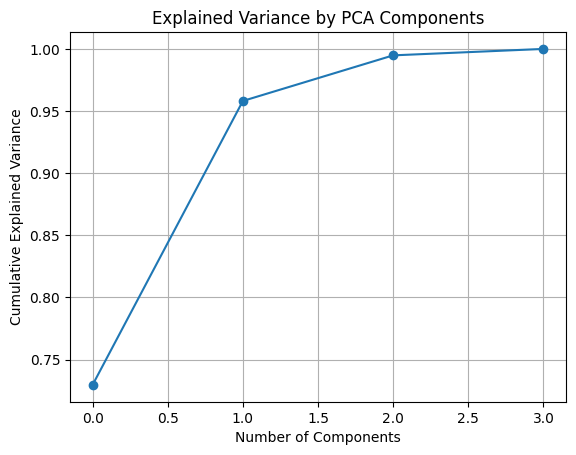

In [158]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()
